In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
from jupyter_dash import JupyterDash
from scipy.stats import pearsonr
from dash import Dash, dcc, html, Input, Output 
import statsmodels.api as sm
import numpy as np


In [2]:
attn_data = pd.read_csv('StudentPerformanceFactors.csv')

In [3]:
attn_data.head(5)

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
#Check to see the df information
attn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
#How many missing variables are there?
attn_data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
print(attn_data['Attendance'].describe())

count    6607.000000
mean       79.977448
std        11.547475
min        60.000000
25%        70.000000
50%        80.000000
75%        90.000000
max       100.000000
Name: Attendance, dtype: float64


In [7]:
# Create bins and labels based on the Attendance data
bins = [60, 69, 79, 89, 100]
labels = ['Low Attendance', 'Moderate Attendance', 'High Attendance', 'Very High Attendance']

# Create a new column in the DataFrame with binned attendance
attn_data['Attendance_Group'] = pd.cut(attn_data['Attendance'], bins=bins, labels=labels)

# Display the first few rows to confirm
attn_data[['Attendance', 'Attendance_Group']].head()

,Attendance,Attendance_Group
0,84,High Attendance
1,64,Low Attendance
2,98,Very High Attendance
3,89,High Attendance
4,92,Very High Attendance


In [8]:
print(attn_data['Exam_Score'].describe())

count    6607.000000
mean       67.235659
std         3.890456
min        55.000000
25%        65.000000
50%        67.000000
75%        69.000000
max       101.000000
Name: Exam_Score, dtype: float64


In [9]:
# Create the bins and labels based on the Exam Scores
es_bins = [54, 60, 69, 79, 89, 101]
es_labels = ['F','D', 'C', 'B', 'A']

# Create a new column in the DataFrame with binned attendance
attn_data['Exam_Score_Group'] = pd.cut(attn_data['Exam_Score'], bins=es_bins, labels=es_labels)

# Show the first few rows to confirm
attn_data[['Exam_Score', 'Exam_Score_Group']].head()

,Exam_Score,Exam_Score_Group
0,67,D
1,61,D
2,74,C
3,71,C
4,70,C


In [10]:
# Still missing attendance_groups and exam groups?
attn_data.isnull().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
Attendance_Group              87
Exam_Score_Group               0
dtype: int64

In [11]:
# Fix the bin edge overlap
attn_data['Attendance_Group'] = pd.cut(attn_data['Attendance'], bins=bins, labels=labels, include_lowest=True, right=True)

In [12]:
# For missing data I am going to fill with 'mode' in the parental_education_level and Teacher_quality
attn_data['Teacher_Quality'] = attn_data['Teacher_Quality'].fillna(attn_data['Teacher_Quality'].mode()[0])
attn_data['Parental_Education_Level'] = attn_data['Parental_Education_Level'].fillna(attn_data['Parental_Education_Level'].mode()[0])

In [13]:
# Drop Distance from home, I will not use this in the analysis
attn_data.drop(columns=['Distance_from_Home'], errors='ignore', inplace=True)

In [14]:
# Make sure that the column was removed
attn_data.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Gender', 'Exam_Score', 'Attendance_Group',
       'Exam_Score_Group'],
      dtype='object')

In [15]:
# Verify that all data is filled
attn_data.isnull().sum()

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Gender                        0
Exam_Score                    0
Attendance_Group              0
Exam_Score_Group              0
dtype: int64

In [16]:
# Any duplicates?
attn_data.duplicated().sum()

np.int64(0)

In [45]:
# Convert Categorical Variables
categorical_columns = ['Parental_Involvement', 'Access_to_Resources', 'Motivation_Level', 'Internet_Access', 
                       'Family_Income', 'Teacher_Quality', 'School_Type', 'Peer_Influence', 'Learning_Disabilities', 
                       'Parental_Education_Level', 'Gender']
attn_data[categorical_columns] = attn_data[categorical_columns].astype('category')


In [18]:
attn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Hours_Studied               6607 non-null   int64   
 1   Attendance                  6607 non-null   int64   
 2   Parental_Involvement        6607 non-null   category
 3   Access_to_Resources         6607 non-null   category
 4   Extracurricular_Activities  6607 non-null   object  
 5   Sleep_Hours                 6607 non-null   int64   
 6   Previous_Scores             6607 non-null   int64   
 7   Motivation_Level            6607 non-null   category
 8   Internet_Access             6607 non-null   category
 9   Tutoring_Sessions           6607 non-null   int64   
 10  Family_Income               6607 non-null   category
 11  Teacher_Quality             6607 non-null   category
 12  School_Type                 6607 non-null   category
 13  Peer_Influence    

In [19]:
# Create a clean copy of the dataset
attn_data.to_csv('cleaned_student_performance.csv', index=False)

# Exploratory Data Analysis (EDA)

## Histograms

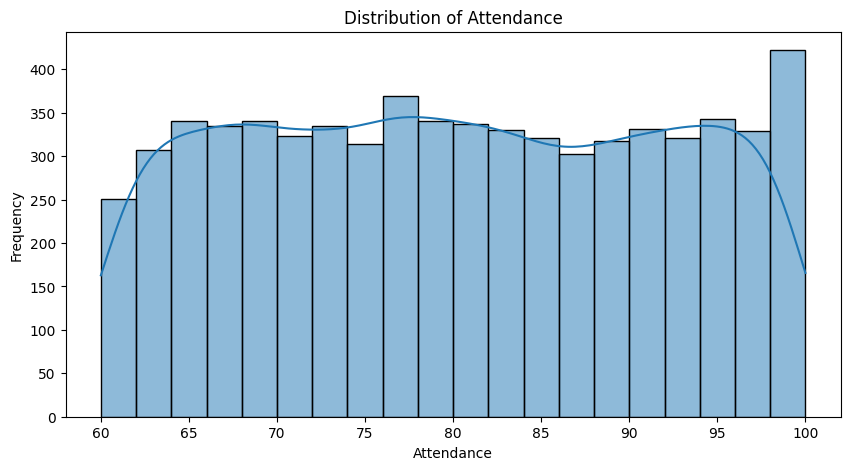

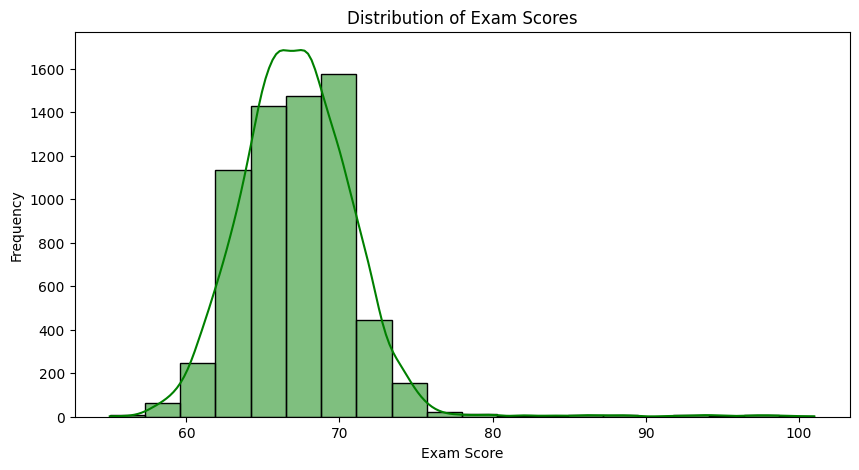

In [20]:
# Histogram for Attendance
plt.figure(figsize=(10, 5))
sns.histplot(attn_data['Attendance'], bins=20, kde=True, color='#1f77b4')
plt.title('Distribution of Attendance')
plt.xlabel('Attendance')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Histogram for Exam_Score
plt.figure(figsize=(10, 5))
sns.histplot(attn_data['Exam_Score'], bins=20, kde=True, color='green')
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

### Attendance Histogram
There is a wide variety of attendance rates. There is a uniform distribution of afftendance rates among students.

### Exam Score Histogram
There is a normal distribution of exam scores.  The histogram is scewed to the left thus showing that most students did not do well on the test.

__________________________________

## Box Plots

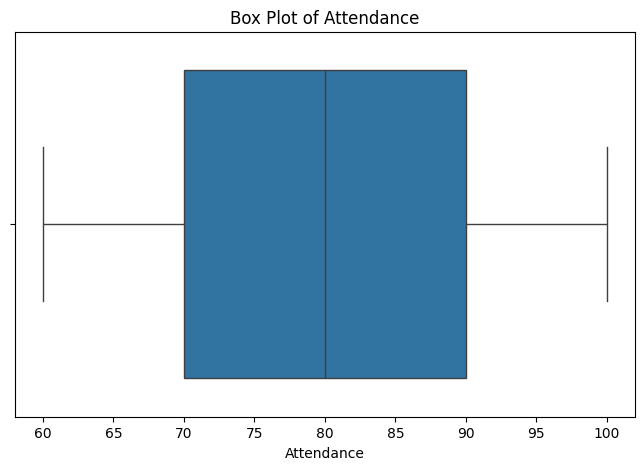

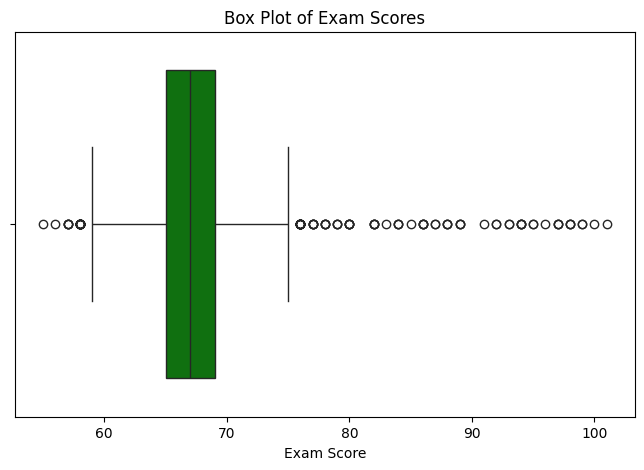

In [21]:
# Box plot for Attendance
plt.figure(figsize=(8, 5))
sns.boxplot(x=attn_data['Attendance'], color='#1f77b4')
plt.title('Box Plot of Attendance')
plt.xlabel('Attendance')
plt.show()

# Box plot for Exam Scores
plt.figure(figsize=(8, 5))
sns.boxplot(x=attn_data['Exam_Score'], color='green')
plt.title('Box Plot of Exam Scores')
plt.xlabel('Exam Score')
plt.show()

# Attendance Box Plot
<b> Fairly Balanced Distribution:</b> The distribution is symmetric with no significant skewness, implying that students' attendance does not have a strong lean towards being predominantly high or low. 

<b>High Variability:</b>The wide range in the box suggests that students' attendance rates are spread out, and it is not concentrated around any particular value (other than the general clustering around 80%).

<b>Even Spread:</b> The whiskers show that while some students have relatively low attendance (60-70) and some have perfect attendance (90-100), the majority of students fall within a broad middle range (70-90).

The balanced nature of the distribution also makes it easier to apply statistical analyses (such as correlation) since the data doesn't suffer from skewness

# Exam Score Box Plot
<b>Most Students Score Similarly:</b> Since the middle 50% of the scores are so tightly clustered around 68, it suggests that the majority of students have very similar academic performance, with little differentiation in their exam scores.

<b>Small Group of High Performers:</b> The high outliers (above 75 and up to 100) show that there is a distinct group of students who perform significantly better than the rest. This indicates a gap between the majority and the top performers.

<b>Right-Skewed Data:</b> The presence of many outliers on the higher side and the longer whisker suggests that a small proportion of students achieve much higher scores than most others.
___________________________________________________

## Bar Plots

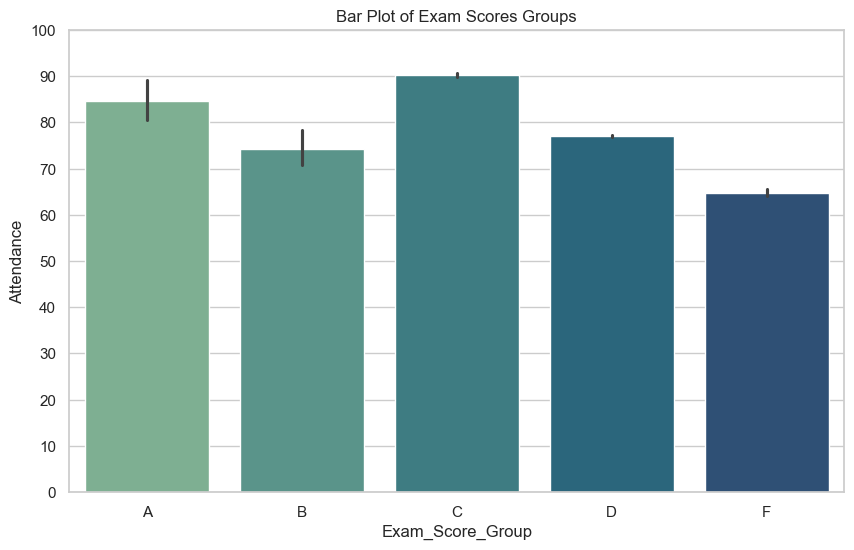

In [36]:
# Define the order for the exam score groups
score_order = ['A', 'B', 'C', 'D', 'F']

# Create and map the palette with the correct number of colors and location for Exam Score Groups
palette = sns.color_palette('crest', len(score_order))
palette_dict_score = dict(zip(score_order, palette))

# Plot the barplot Exam Score Groups (A-F)
plt.figure(figsize=(10, 6))
sns.barplot(x='Exam_Score_Group', y='Attendance', data=attn_data, hue='Exam_Score_Group', palette=palette_dict_score, order=score_order)
plt.yticks(range(0, 101, 10))
plt.title('Bar Plot of Exam Scores Groups')
plt.show()

## Exam Score Bar Plot
The chart shows that students who made an A or B on their test, have more variable attendance rates compared to other groups.

Students who made a C, D or F have more consistant attendance rates as indicated by the smaller error bars.

This shows that students who fail, also have the lowest attendance out of all groups

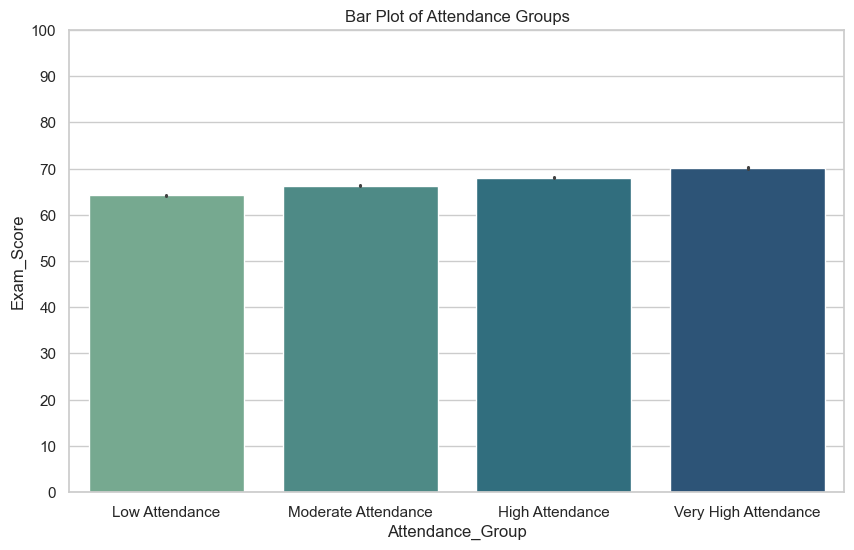

In [37]:
# Define the order for the attendance groups
attendance_order = ['Low Attendance', 'Moderate Attendance', 'High Attendance', 'Very High Attendance']

# Create a palette for Attendance Groups
palette_attendance = sns.color_palette('crest', len(attendance_order))
palette_dict_attendance = dict(zip(attendance_order, palette_attendance))

# Plot the barplot for Attendance Groups
plt.figure(figsize=(10, 6))
sns.barplot(x='Attendance_Group', y='Exam_Score', hue='Attendance_Group', data=attn_data, palette=palette_dict_attendance, order=attendance_order)
plt.yticks(range(0, 101, 10))
plt.title('Bar Plot of Attendance Groups')
plt.show()

## Attendance Group Bar Plot
The chart shows a clear trend that as students come to school more, they are more likely to score higher on their final exam compared to the low attendance group of students.  Each group that attends school more then the last, scores better. 
____________________________________

## Scatter Plot

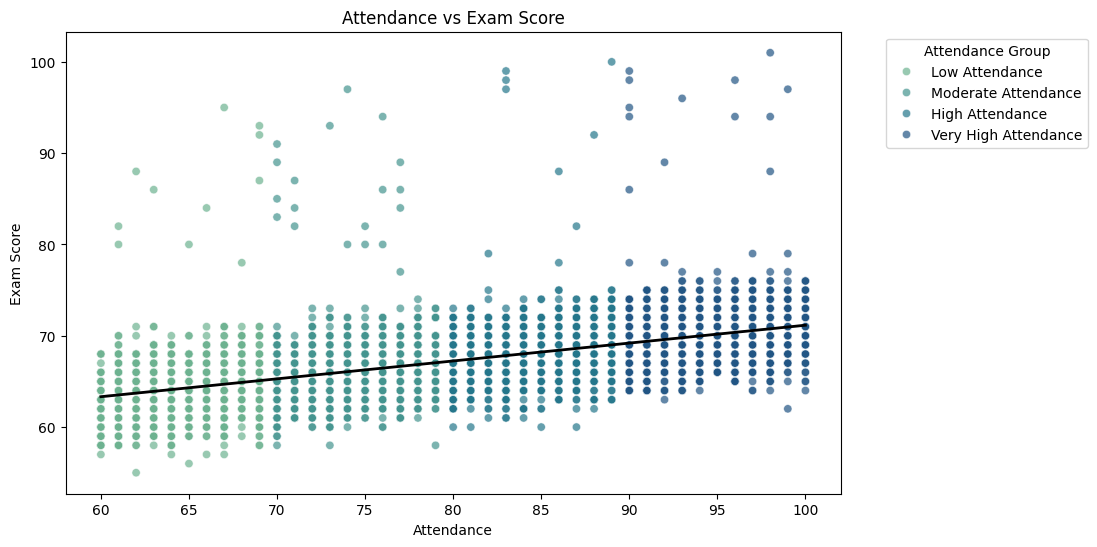

In [27]:
# Scatter plot for Attendance vs Exam Score
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Attendance', y='Exam_Score', data=attn_data, hue='Attendance_Group', palette='crest', alpha=0.7)
sns.regplot(x='Attendance', y='Exam_Score', data=attn_data, scatter=False, color='black', line_kws={"linewidth":2})
plt.title('Attendance vs Exam Score')
plt.xlabel('Attendance')
plt.ylabel('Exam Score')
plt.legend(title='Attendance Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

This scatter plot clearly shows that students who showed up 90% of the time and higher, scored significantly better on exams than students who had low and moderate attendance rates.

# Statistical Analysis

## Heatmap

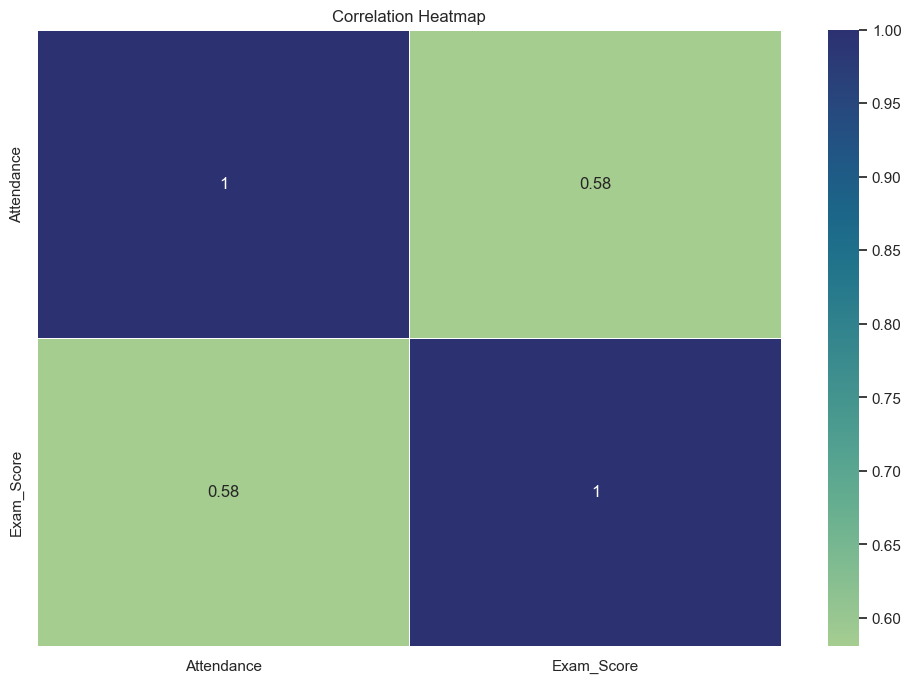

In [43]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
correlation_matrix = attn_data[['Attendance', 'Exam_Score']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [44]:
corr = attn_data[['Attendance', 'Exam_Score']].corr()
print(corr)

            Attendance  Exam_Score
Attendance    1.000000    0.581072
Exam_Score    0.581072    1.000000


# Heatmap
The top-right and bottom-left cells (both 0.58) represent the correlation between Attendance and Exam_Score.

A value of 0.58 indicates a moderate positive correlation between attendance and exam scores. This means that as attendance increases, exam scores tend to increase as well, but it's not a perfect linear relationship.

The top-right and bottom-left quadrants are light green because the correlation is 0.58 (less than 1 but still positively correlated).

In [39]:

corr_coefficient, p_value = pearsonr(attn_data['Attendance'], attn_data['Exam_Score'])
print(f"Correlation Coefficient: {corr_coefficient}, P-value: {p_value}")


Correlation Coefficient: 0.5810718633120641, P-value: 0.0


Since the p-value is 0.0, we can conclude that the correlation between Attendance and Exam_Score is highly significant, and it is very unlikely that this relationship is due to random chance.

## OLS Regression

In [40]:
# Define the predictor and response variables
X = attn_data['Attendance']  # Predictor
y = attn_data['Exam_Score']  # Response

# Add a constant to the predictor variable 
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.338
Method:                 Least Squares   F-statistic:                     3367.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:07:34   Log-Likelihood:                -16989.
No. Observations:                6607   AIC:                         3.398e+04
Df Residuals:                    6605   BIC:                         3.400e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.5786      0.273    189.191      0.0

## Interpretation of the Results
<b>R-squared (0.338):</b>
While 33.8% of the variance in Exam_Score is explained by Attendance, it also means that other factors not included in this model account for the remaining variance. This indicates that attendance is a significant predictor, but it is not the sole factor affecting exam scores.

<b>Attendance Coefficient (0.1958):</b>
The positive slope indicates that higher attendance is associated with higher exam scores. For each additional percentage point in attendance, the exam score increases by approximately 0.196 points on average.

<b>Model Significance:</b>
The model is statistically significant (p-value 0.00), which means that Attendance is a meaningful predictor of Exam_Score.

# What else has an impact on exam scores?

In [48]:
# Define multiple predictors
predictors = ['Attendance', 'Hours_Studied', 'Sleep_Hours']  
X = attn_data[predictors]
y = attn_data['Exam_Score']

# Add a constant for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.541
Method:                 Least Squares   F-statistic:                     2599.
Date:                Tue, 01 Oct 2024   Prob (F-statistic):               0.00
Time:                        09:15:54   Log-Likelihood:                -15775.
No. Observations:                6607   AIC:                         3.156e+04
Df Residuals:                    6603   BIC:                         3.158e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            45.8436      0.297    154.101

## Results
<b>Attendance Coefficent is 0.1972.</b>  For every 1% increase in attendance, the exam score is expected to increase by 0.197 points, holding all other variables constant.
<b>Hours_Studied Coefficent is	0.2931.</b>	For every additional hour studied, the exam score is expected to increase by 0.293 points, holding all other variables constant.
<b>Sleep_Hours	Coefficent is -0.0335.</b>	For every additional hour of sleep, the exam score decreases by 0.034 points. However, this effect is not statistically significant (p-value 0.129).

# Summary Report
## Objective
The primary goal of this analysis was to explore the relationship between student attendance (Attendance) and academic performance (Exam_Score). Using the categorized variable Attendance_Group, the analysis aimed to provide insights into how varying levels of attendance correlate with exam performance, while identifying actionable recommendations for improving student outcomes.

## Key Insights from the Analysis
<b>1. Attendance and Academic Performance</b>
- The analysis shows a moderate positive correlation between Attendance and Exam_Score (r ≈ 0.58), indicating that higher attendance is generally associated with better academic performance. The linear regression model confirms this relationship, where every percentage increase in attendance is linked to a slight increase in the expected exam score.

<b>2. Differences Across Attendance Groups</b>
- Students were grouped into four Attendance_Groups: Low Attendance, Moderate Attendance, High Attendance, and Very High Attendance.
- The average exam scores across these groups were visualized using a bar chart, revealing a clear upward trend from "Low Attendance" to "Very High Attendance."
    - Low Attendance is associated with significantly lower exam scores.
    - Moderate and High Attendance groups show noticeable improvements in exam scores, but with diminishing returns.
    - Very High Attendance students tend to achieve the highest average exam scores, suggesting consistent attendance is a strong predictor of better academic performance.
    
<b>3. Additional Predictors of Exam Scores</b>
- While Attendance explains a significant portion of the variance in exam scores, additional predictors like Hours_Studied also play a role.
    - A multiple linear regression model incorporating Hours_Studied and Sleep_Hours demonstrated that while both attendance and study hours are significant predictors of exam scores, the effect of Sleep_Hours was not statistically significant in this analysis.
    - This suggests that academic habits (attendance and study time) are more influential than sleep patterns on exam performance within this dataset.
_______________________________________________________

## Actionable Recommendations
<b>1. Promote Consistent Attendance:</b>

- <b>Interventions for At-Risk Groups:</b> Identify students in the "Low Attendance" category and provide interventions to improve their attendance. This could involve parental engagement, counseling, and attendance rewards programs.
- <b>Attendance Tracking and Motivation:</b> Encourage consistent attendance through motivational programs, attendance-based incentives, and supportive policies that make it easier for students to attend school regularly.

<b>2. Encourage Effective Study Habits:</b>

- <b>Study Support Programs:</b> Offer study support programs, such as tutoring sessions and study skills workshops, to help students in the "Low" and "Moderate Attendance" groups improve their study habits.
- <b>Balanced Approach to Studying:</b> While attendance and study hours have a positive impact, focus on promoting a balanced approach to learning, ensuring that students don't overextend themselves.

<b>3. Leverage Predictive Analytics:</b>

- <b>Early Identification:</b> Use predictive analytics to identify students at risk of low performance based on attendance patterns, allowing for early interventions and support.
- <b>Targeted Interventions:</b> By understanding the attendance-performance relationship, school administrators can design targeted interventions aimed at specific Attendance_Groups, such as extra academic support for "Moderate" and "Low Attendance" students.

_______________________________

# Visuals for the Dashboard

In [48]:
# Set renderer 
pio.renderers.default = 'iframe'

# Create scatter plot for dashboard
fig = px.scatter(attn_data, x='Attendance', y='Exam_Score', trendline='ols', color='Attendance', title='Attendance vs. Exam Score')
fig.show()

In [49]:
# Calculate average exam scores by attendance group
avg_scores = attn_data.groupby('Attendance_Group', observed=True)['Exam_Score'].mean().reset_index()

# Ensure the correct order of categories
avg_scores['Attendance_Group'] = pd.Categorical(avg_scores['Attendance_Group'], categories=attendance_order, ordered=True)

# Sort the data based on the new order
avg_scores = avg_scores.sort_values('Attendance_Group')

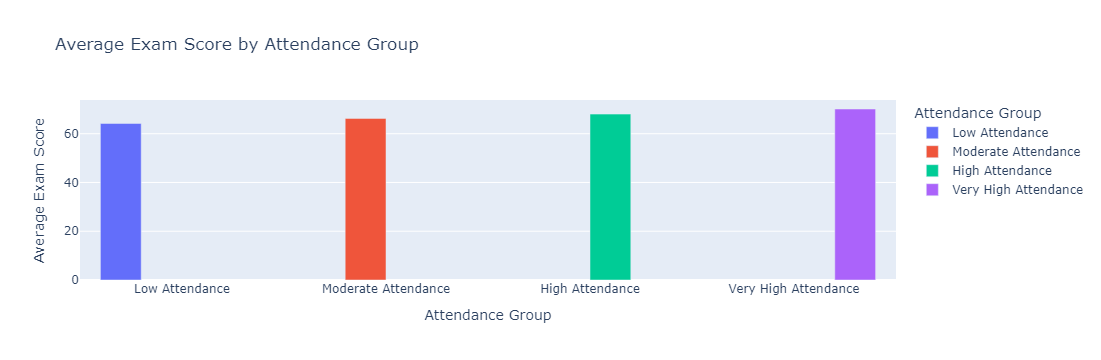

In [52]:
# Create the bar chart in JupyterLab

fig = px.bar(
    avg_scores, 
    x='Attendance_Group', 
    y='Exam_Score', 
    title='Average Exam Score by Attendance Group',
    labels={'Exam_Score': 'Average Exam Score', 'Attendance_Group': 'Attendance Group'},
    color='Attendance_Group', 
    category_orders={'Attendance_Group': attendance_order},  
    color_discrete_sequence=px.colors.qualitative.Plotly,  
    barmode='group'
)
fig.show()

# Dash - Dashboard

In [60]:
# Initialize Dash app
app = Dash(__name__)

# Set the default renderer
pio.renderers.default = 'iframe'

app.layout = html.Div([
    html.H1("Student Performance Analysis Dashboard"),
    
    # Dropdown filter for Study Hours
    html.Label('Filter by Study Hours'),
    dcc.RangeSlider(
        id='hours-studied-filter',
        min=attn_data['Hours_Studied'].min(),
        max=attn_data['Hours_Studied'].max(),
        step=1,
        value=[attn_data['Hours_Studied'].min(), attn_data['Hours_Studied'].max()],
        marks={i: str(i) for i in range(int(attn_data['Hours_Studied'].min()), int(attn_data['Hours_Studied'].max())+1, 10)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    
    # Dropdown filter for Sleep Hours
    html.Label('Filter by Sleep Hours'),
    dcc.RangeSlider(
        id='sleep-hours-filter',
        min=attn_data['Sleep_Hours'].min(),
        max=attn_data['Sleep_Hours'].max(),
        step=1,
        value=[attn_data['Sleep_Hours'].min(), attn_data['Sleep_Hours'].max()],
        marks={i: str(i) for i in range(int(attn_data['Sleep_Hours'].min()), int(attn_data['Sleep_Hours'].max())+1)},
        tooltip={"placement": "bottom", "always_visible": True}
    ),
    
    # Scatter plot for Attendance vs Exam Score
    dcc.Graph(id='scatter-plot'),

    # Bar chart for Average Exam Score by Attendance Group
    dcc.Graph(id='bar-chart')
])

In [61]:
@app.callback(
    [Output('scatter-plot', 'figure'), Output('bar-chart', 'figure')],
    [Input('hours-studied-filter', 'value'), Input('sleep-hours-filter', 'value')]
)
def update_graphs(hours_range, sleep_range):
    # Filter data based on the selected ranges for study hours and sleep hours
    filtered_data = attn_data[
        (attn_data['Hours_Studied'] >= hours_range[0]) & (attn_data['Hours_Studied'] <= hours_range[1]) &
        (attn_data['Sleep_Hours'] >= sleep_range[0]) & (attn_data['Sleep_Hours'] <= sleep_range[1])
    ]

    # Recalculate average exam scores by attendance group based on the filtered data
    avg_scores_filtered = filtered_data.groupby('Attendance_Group', observed=True)['Exam_Score'].mean().reset_index()
    
    # Ensure the correct order of categories
    avg_scores_filtered['Attendance_Group'] = pd.Categorical(avg_scores_filtered['Attendance_Group'], categories=attendance_order, ordered=True)
    
    # Sort the data based on the new order
    avg_scores_filtered = avg_scores_filtered.sort_values('Attendance_Group')

    # Create scatter plot with trend line
    scatter_fig = px.scatter(
        filtered_data, 
        x='Attendance', 
        y='Exam_Score', 
        trendline='ols', 
        color='Attendance', 
        title='Attendance vs. Exam Score',
        labels={'Attendance': 'Attendance (%)', 'Exam_Score': 'Exam Score'}
    )
    
    # Create bar plot for average exam score by group
    bar_fig = px.bar(
        avg_scores_filtered, 
        x='Attendance_Group', 
        y='Exam_Score', 
        title='Average Exam Score by Attendance Group',
        labels={'Exam_Score': 'Average Exam Score', 'Attendance_Group': 'Attendance Group'},
        color='Attendance_Group', 
        category_orders={'Attendance_Group': attendance_order},  
        color_discrete_sequence=px.colors.qualitative.Plotly,  
        barmode='group'
    )
    
    # Update layout for better readability
    bar_fig.update_xaxes(tickangle=-45)
    
    return scatter_fig, bar_fig

In [62]:
app.run_server(mode='inline')

With this setup, users can interactively explore how study hours and sleep affect the relationship between attendance and exam performance in a Dash dashboard. 